In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import csv


plt.style.use('bmh')
sns.set_style('darkgrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%autosave 10

Autosaving every 10 seconds


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
sstrain = StandardScaler()
sstest = StandardScaler()

In [3]:
house = pd.read_csv('./house_1.csv')


In [4]:
house.head()

,Unnamed: 0,SalePrice,age,FullBath,HalfBath,BedroomAbvGr,YrSold,Top5,LotArea,YearBuilt,...,LessDense,GarageCars,TotalBsmtSF,exterior,aircon,kitQ,BFT,OverallCond,OverallQual,ABNORMAL
0,0,208500,7,2,1,3,2008,0,8450,2003,...,1,2,856,2,1,0,1,5,7,0
1,1,181500,34,2,0,3,2007,1,9600,1976,...,1,2,1262,1,1,0,0,8,6,0
2,2,223500,9,2,1,3,2008,0,11250,2001,...,1,2,920,2,1,0,1,5,7,0
3,3,140000,95,1,0,3,2006,0,9550,1915,...,1,3,756,0,1,0,0,5,7,1
4,4,250000,10,2,1,4,2008,1,14260,2000,...,1,3,1145,2,1,0,1,5,8,0


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 24 columns):
Unnamed: 0      1450 non-null int64
SalePrice       1450 non-null int64
age             1450 non-null int64
FullBath        1450 non-null int64
HalfBath        1450 non-null int64
BedroomAbvGr    1450 non-null int64
YrSold          1450 non-null int64
Top5            1450 non-null int64
LotArea         1450 non-null int64
YearBuilt       1450 non-null int64
GrLivArea       1450 non-null int64
GarageArea      1450 non-null int64
FancyHouse      1450 non-null int64
TallHouse       1450 non-null int64
LessDense       1450 non-null int64
GarageCars      1450 non-null int64
TotalBsmtSF     1450 non-null int64
exterior        1450 non-null int64
aircon          1450 non-null int64
kitQ            1450 non-null int64
BFT             1450 non-null int64
OverallCond     1450 non-null int64
OverallQual     1450 non-null int64
ABNORMAL        1450 non-null int64
dtypes: int64(24)
memory usag

In [6]:
house.columns

Index(['Unnamed: 0', 'SalePrice', 'age', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'YrSold', 'Top5', 'LotArea', 'YearBuilt', 'GrLivArea',
       'GarageArea', 'FancyHouse', 'TallHouse', 'LessDense', 'GarageCars',
       'TotalBsmtSF', 'exterior', 'aircon', 'kitQ', 'BFT', 'OverallCond',
       'OverallQual', 'ABNORMAL'],
      dtype='object')

In [7]:
from sklearn.linear_model import ElasticNet
from ipywidgets import *
from cycler import cycler


X = house[[
    'age', 'FullBath', 'HalfBath','BedroomAbvGr', 'Top5', 'LotArea', 
    'GrLivArea', 'FancyHouse', 'TallHouse', 'LessDense', 
    'GarageCars', 'TotalBsmtSF', 
    'exterior', 'aircon', 'kitQ', 'BFT', 
    'OverallCond', 'OverallQual'
]]

y = house[['SalePrice']]



def coef_plotter(alphas, coefs, feature_names, to_alpha, regtype='ridge'):
    
    # Get the full range of alphas before subsetting to keep the plots from 
    # resetting axes each time. (We use these values to set static axes later).
    amin = np.min(alphas)
    amax = np.max(alphas)
    
    # Subset the alphas and coefficients to just the ones below the set limit
    # from the interactive widget:
    alphas = [a for a in alphas if a <= to_alpha]
    coefs = coefs[0:len(alphas)]
    
    # Get some colors from seaborn:
    colors = sns.color_palette("husl", len(coefs[0]))
    
    # Get the figure and reset the size to be wider:
    fig = plt.figure()
    fig.set_size_inches(18,5)

    # We have two axes this time on our figure. 
    # The fig.add_subplot adds axes to our figure. The number inside stands for:
    #[figure_rows|figure_cols|position_of_current_axes]
    ax1 = fig.add_subplot(121)
    
    # Give it the color cycler:
    ax1.set_prop_cycle(cycler('color', colors))
    
    # Print a vertical line showing our current alpha threshold:
    ax1.axvline(to_alpha, lw=2, ls='dashed', c='k', alpha=0.4)
    
    # Plot the lines of the alphas on x-axis and coefficients on y-axis
    ax1.plot(alphas, coefs, lw=2)
    
    # set labels for axes:
    ax1.set_xlabel('alpha', fontsize=20)
    ax1.set_ylabel('coefficients', fontsize=20)
    
    # If this is for the ridge, set this to a log scale on the x-axis:
    if regtype == 'ridge':
        ax1.set_xscale('log')
    
    # Enforce the axis limits:
    ax1.set_xlim([amin, amax])
    
    # Put a title on the axis
    ax1.set_title(regtype+' coef paths\n', fontsize=20)
    
    # Get the ymin and ymax for this axis to enforce it to be the same on the 
    # second chart:
    ymin, ymax = ax1.get_ylim()

    # Add our second axes for the barplot in position 2:
    ax2 = fig.add_subplot(122)
    
    # Position the bars according to their index from the feature names variable:
    ax2.bar(range(1, len(feature_names)+1), coefs[-1], align='center', color=colors)
    ax2.set_xticks(range(1, len(feature_names)+1))
    
    # Reset the ticks from numbers to acutally be the names:
    ax2.set_xticklabels(feature_names, rotation=90, fontsize=12)
    
    # enforce limits and add titles, labels
    ax2.set_ylim([ymin, ymax])
    ax2.set_title(regtype+' predictor coefs\n', fontsize=20)
    ax2.set_xlabel('coefficients', fontsize=20)
    ax2.set_ylabel('alpha', fontsize=20)
    
    plt.show()


def elasticnet_coefs(X, Y, alphas):
    coefs = []
    enet_reg = ElasticNet()
    for a in alphas:
        enet_reg.set_params(alpha=a, l1_ratio=0.05)
        enet_reg.fit(X, Y)
        coefs.append(enet_reg.coef_)
        
    return coefs

enet_alphas = np.arange(0.01, 1.0, 0.005)
enet_coefs = elasticnet_coefs(X, y, enet_alphas)

def enet_plot_runner(alpha=0.01):
    coef_plotter(enet_alphas, enet_coefs, X.columns, alpha, regtype='elastic net')

interact(enet_plot_runner, alpha=(0.0,1.0,0.005))

A Jupyter Widget

<function __main__.enet_plot_runner>

In [8]:
house.columns

Index(['Unnamed: 0', 'SalePrice', 'age', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'YrSold', 'Top5', 'LotArea', 'YearBuilt', 'GrLivArea',
       'GarageArea', 'FancyHouse', 'TallHouse', 'LessDense', 'GarageCars',
       'TotalBsmtSF', 'exterior', 'aircon', 'kitQ', 'BFT', 'OverallCond',
       'OverallQual', 'ABNORMAL'],
      dtype='object')

In [9]:
np.sort(house['YrSold'].unique())

array([2006, 2007, 2008, 2009, 2010])

In [10]:
old = house['YrSold'] < 2010
new = house['YrSold'] == 2010

In [11]:
# #'age', 'FullBath', 'HalfBath',
#        'BedroomAbvGr', 'Top5', 'LotArea', 'GrLivArea',
#        'FancyHouse', 'TallHouse', 'LessDense', 'GarageCars',
#        'TotalBsmtSF', 'exterior', 'aircon', 'kitQ', 'BFT', 
#       'OverallCond','OverallQual'

Xtrain = house[old]
ytrain = Xtrain[['SalePrice']]
Xtrain = Xtrain[[
    'LotArea', 'age', 'Top5', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 
    'FancyHouse', 'TallHouse', 'LessDense', 'OverallCond','OverallQual'
]]

Xtrain = sstrain.fit_transform(Xtrain)
#
#------------------------------------------------------------#
Xtest = house[new]
ytest = Xtest[['SalePrice']]
Xtest = Xtest[[
    'LotArea', 'age', 'Top5', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 
    'FancyHouse', 'TallHouse', 'LessDense', 'OverallCond','OverallQual'
]]

Xtest = sstest.fit_transform(Xtest)


#------------------------------------------------------------#
#     'LotArea', 'age', 'Top5', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FancyHouse', 'TallHouse', 'LessDense'


In [12]:
linreg = LinearRegression()

linreg.fit(X = Xtrain, y = ytrain)
yhat = linreg.predict(Xtest)
linreg.score(Xtest, ytest)

print(linreg.score(Xtest, ytest))
linreg.coef_


0.808371969266


array([[  4541.93619394, -12205.12961815,  15199.80185061,  29425.86341578,
          8736.45142537,   5411.92142002,   4398.95983406,  -4340.61630393,
          3399.96714523,   7867.60149581,  22751.95640885]])

In [13]:
# plt.figure(figsize=(10, 20))
# plt.scatter(yhat, ytest)
# plt.xlabel("predicted")
# plt.ylabel("actual")


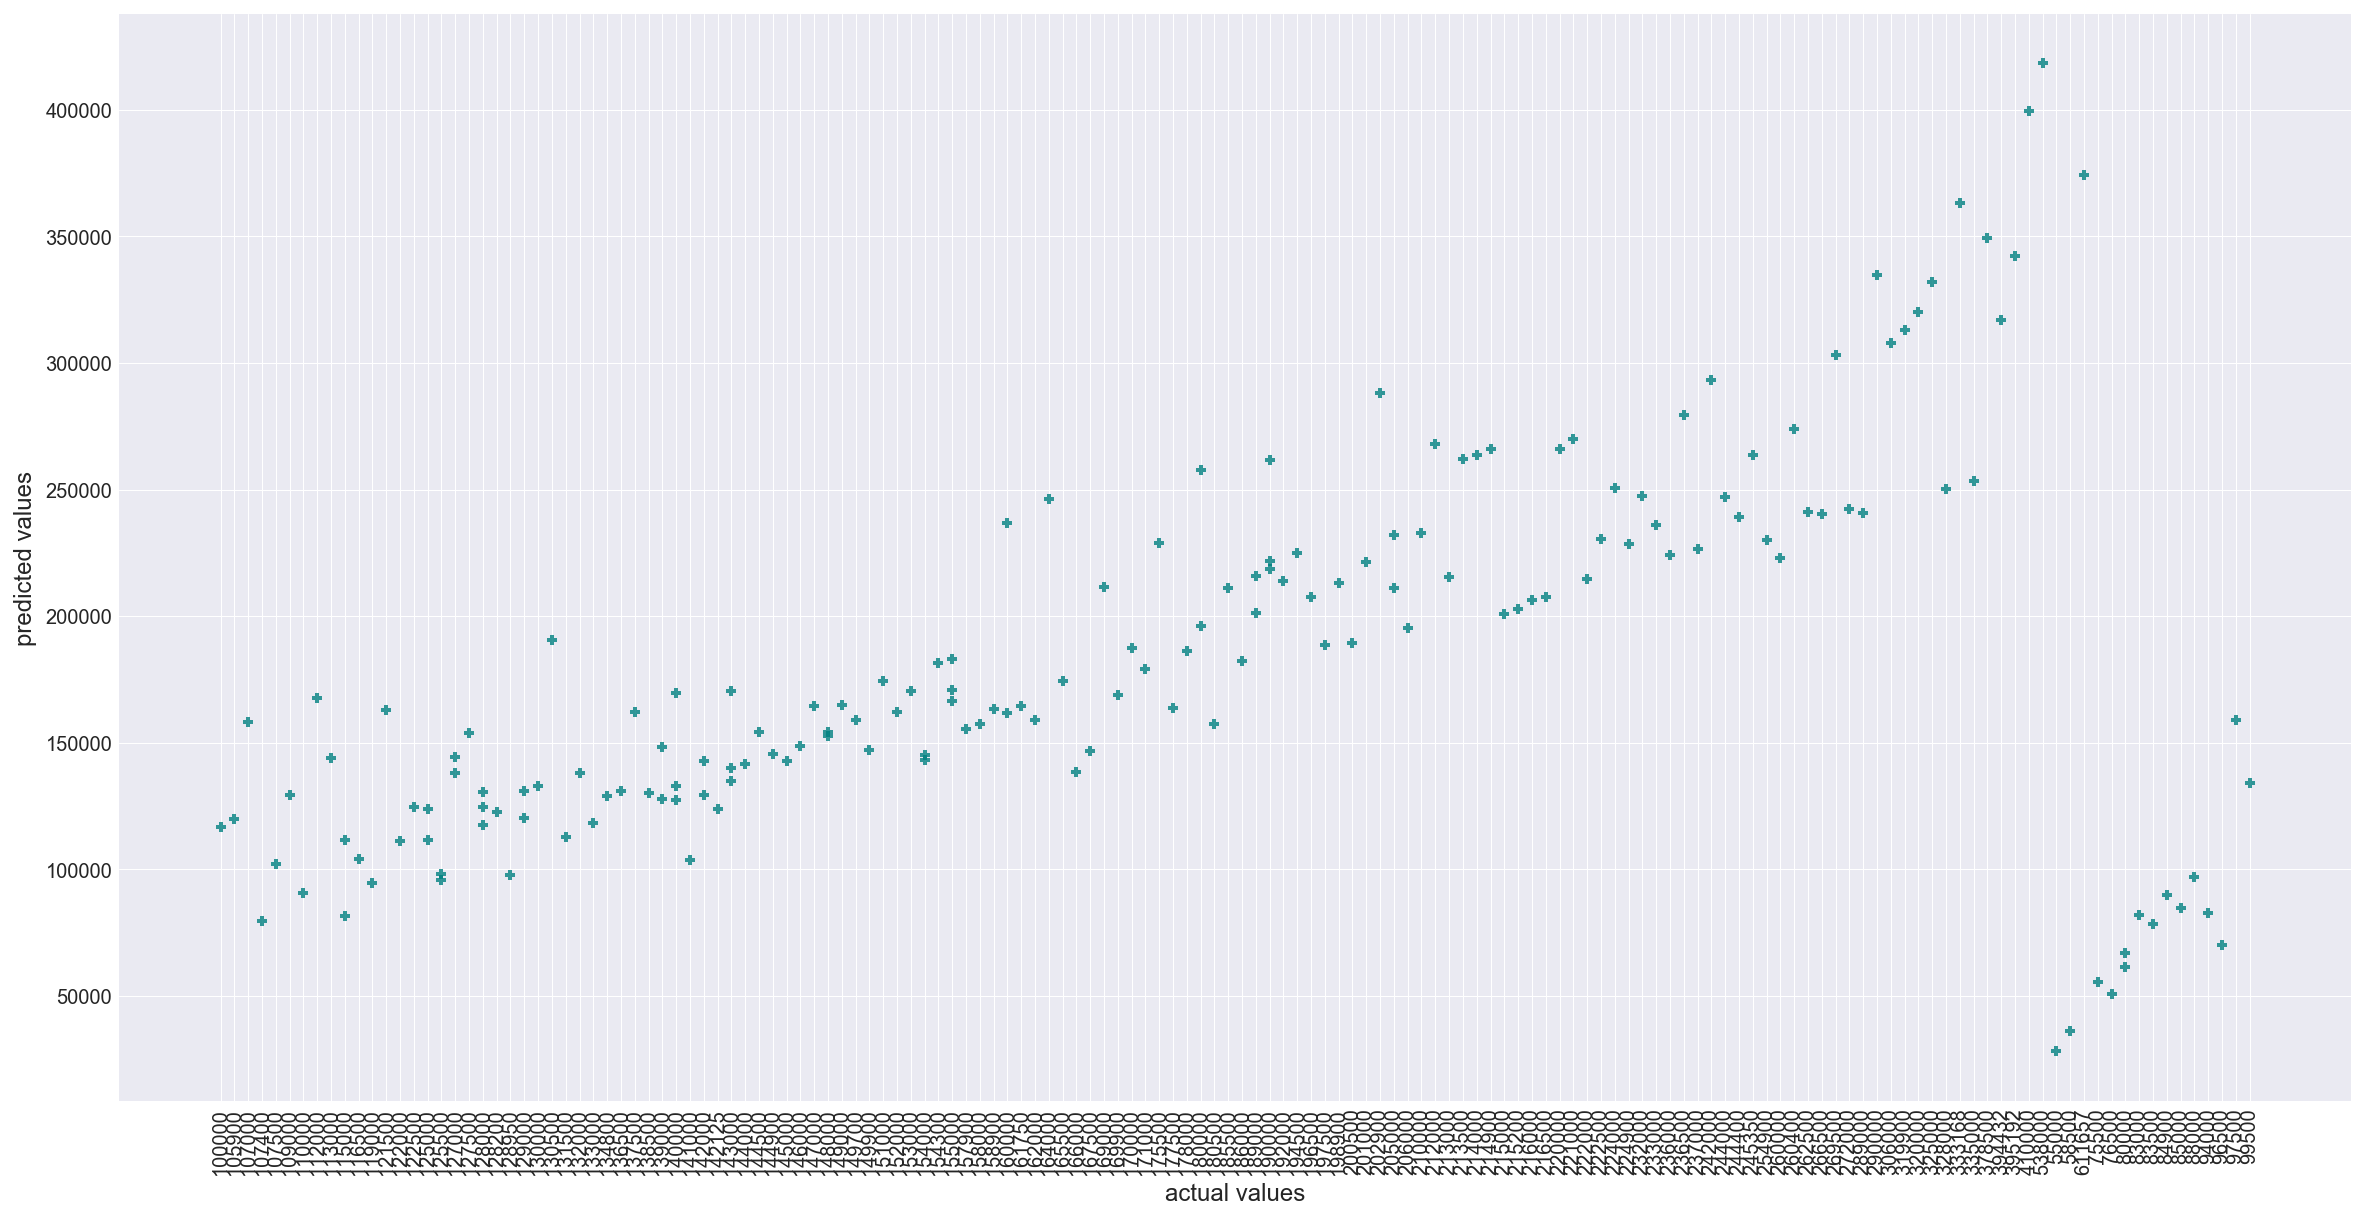

score:  0.808371969266


In [14]:
predictions  =  linreg.predict(Xtest)
score        =  linreg.score(Xtest, ytest)


# Plot the model
plt.figure(figsize=(20,10))
plt.scatter(ytest, yhat, s=30, c='teal', marker='+', alpha=0.8)
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.xticks(rotation='vertical')



plt.show()

print("score: ", score)

In [15]:
#try totalbasement instead of first floor, and garage cars instead of garage area

In [16]:
#0.769741491999 - without houses priced over 500000
#0.727363377592 - without very large houses
#0.690728574497 - without 'FancyHouse', 'TallHouse', 'LessDense'
#0.748897866064 - without GarageCars, TotalBsmtSF
#0.795242498504 - current model1
#0.776281790089 - without LotArea
#0.595763462689 - 'age', 'BedroomAbvGr', 'HalfBath', 'Top5', 'GarageCars', 'FancyHouse', 'TallHouse', 'LessDense'


In [17]:
#0.795242498504 - model 1 current model
#'LotArea', 'age', 'Top5', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FancyHouse', 'TallHouse', 'LessDense'


In [18]:
#0.847136545881 -- without 'OverallCond', 'OverallQual'
#'LotArea', 'age', 'Top5', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FancyHouse', 'TallHouse', 'LessDense','exterior', 'aircon', 'kitQ', 'BFT'

In [19]:
#0.842053656762 -- add kitchen only

In [20]:
#0.808371969266 --w 'OverallCond', 'OverallQual' but no kitchen etc

In [21]:
#0.848314681837 --
#     'LotArea', 'age', 'Top5', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 
#     'FancyHouse', 'TallHouse', 'LessDense', 'OverallCond', 'OverallQual',
#     'kitQ', 'BFT'

In [22]:
#0.84937710217 --doing well
#     'LotArea', 'age', 'Top5', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 
#     'FancyHouse', 'TallHouse', 'LessDense', 'OverallCond', 'OverallQual',
#     'exterior', 'aircon', 'kitQ', 'BFT'

In [23]:
##EVERYTHING??#
# 0.852934048688  --new best, but so many dimensions

#     'age', 'FullBath', 'HalfBath','BedroomAbvGr', 'Top5', 'LotArea', 
#     'GrLivArea', 'FancyHouse', 'TallHouse', 'LessDense', 
#     'GarageCars', 'TotalBsmtSF', 
#     'exterior', 'aircon', 'kitQ', 'BFT', 
#     'OverallCond', 'OverallQual'

In [24]:
#what the elastic net wants

#nahhhh

In [25]:
#Reducing dimensions by heatmap
#0.820734197937
#'OverallQual', 'GrLivArea', 'GarageCars', 'age', 'kitQ', 'BFT', 'FancyHouse', 'Top5'

In [26]:
#OLD MODEL W 'OverallQual' added
#0.801135490774

0.801135490774 - 0.795242498504

0.005892992270000064

In [27]:
#ONLY ~0.006 IMPROVEMENT FROM ADDING OVERALLQUALITY

In [28]:
#add kitQ instead (ie. OLD MODEL W 'kitQ' added)
#0.842053656762
0.842053656762 - 0.795242498504

0.046811158257999974

In [29]:
# ~0.05 improvement from kitchen quality alone 
#if renovating kitchen quality to excellent is responsible for 5% of price, 
#it is a worthwhile investment to purchase houses with inferior kitchen, 
#and renovate to excellent

In [30]:
#add BFT instead (ie. OLD MODEL W 'BFT' added)
#0.800159506233

#not good enough

0.800159506233 - 0.795242498504

0.004917007729000056